In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
%load_ext autoreload
%autoreload 2
from implementations import *

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your thing crazy machine learning thing here :) ...

## Cleaning of data and visualisation

In [3]:
#Clean data

#a = np.array([[3.0,8.0,5.0,-999.0,1.0],[7.0,4.0,1.0,2.0,6.0]])

#remove -999 to the mean of the colum
for column in tX.T:
    clean = column[np.where(column != -999)]
    mean = np.mean(clean)
    column[np.where(column == -999)] = mean
    
tX_clean = tX
for column in tX_clean.T:
    mean = np.mean(column)
    var = np.var(column)
    if(var == 0):
        var =1
    column[:] = (column[:] - mean)/var
    


In [43]:
#split data
ratio_train_test = 0.6
ratio_test_train = 0.5
#60% train, 20%test, 20%cross
x_train, x_test, y_train,y_test = split_data(y,tX_clean,ratio_train_test)
x_test,x_cv,y_test,y_cv = split_data(y,x_test,ratio_test_train)

/Users/Mick/anaconda/lib/python3.5/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


## Test of the different methods

In [5]:
#*********************** least squares *******************#
#mse,weight = least_squares(y,tX)
mse,weight = least_squares(y_train,x_train)
print(mse)
print(weight)

0.388690660324
[  9.40097809e-01  -9.37929197e+00  -1.07849449e+01  -8.01976547e-01
   2.05727485e-02   1.95087405e+01   2.11796906e-02   2.13453420e-01
  -5.63861368e-01   5.04264398e+04  -1.45780410e-01   1.43722280e-01
   1.63897735e-02  -1.88741318e+03   4.15332284e-03  -6.56256251e-04
  -1.82764812e+03  -1.28142882e-04   4.54958180e-03   3.70150686e+00
   1.53517936e-02  -6.24953086e+00   4.14036400e-02  -2.63139815e+00
  -8.40228894e-03   4.25742004e-03  -6.23028429e-01  -3.89330875e-04
  -2.62716048e-03  -3.61849259e+04]


In [41]:
#******************** gradient descent *******************#
w_initial = np.zeros([tX.shape[1]])
max_iters = 500
gamma = 0.08
mse,weight = least_squares_GD(y_train,x_train,w_initial,max_iters,gamma)
print(mse)
print(weight)

0.429612557216
[ -1.75843213e-02  -1.78862178e-01  -2.37606436e-02   5.06382239e-02
   6.36133261e-02   6.27332862e-03  -7.21106097e-02   6.55417949e-02
  -6.05046852e-02   2.13563399e-02  -1.45216974e-01   2.80877241e-01
   1.90500637e-02   1.80367157e-01   2.45891111e-04  -6.61610173e-03
   1.29251330e-01   2.50158614e-03   1.08936294e-02   7.50402378e-03
   6.86792223e-03   1.30649147e-02   5.31021641e-02   5.94469568e-02
  -2.93794533e-03   5.79381839e-03   2.30874441e-04   4.31932278e-03
  -3.18171742e-04   1.37805333e-02]


In [43]:
#************** stochastic gradient descent ****************#
w_initial = np.zeros([tX.shape[1]])
batch_size = 1
max_iters = 1000
gamma = 0.0001
mse_SGD,weight_SGD = least_squares_SGD(y_train,x_test,w_initial,batch_size,max_iters,gamma)
print(mse_SGD)
print(weight)

2.20412590418e-05
[  7.36188883e-01  -9.25032447e+00  -1.00360471e+01  -8.09252695e-01
   6.77793220e-03   2.02690242e+01  -7.22268855e-03   2.02701036e-01
  -5.71814284e-01   1.73535549e+04  -1.49024914e-01   1.50339726e-01
   1.77573017e-02  -6.47195533e+02   2.77889331e-03  -4.20521656e-03
  -6.25115499e+02   8.57532803e-04   7.37286302e-03   3.43265782e+00
  -3.46753962e-03  -5.06114070e+00   3.88456413e-02  -2.02768325e+00
  -3.76196261e-03   6.14023759e-03  -7.02170120e-01   4.99534980e-03
  -1.24345729e-03  -1.24524975e+04]


In [52]:
#test poly
a = [[2,4,5],[3,9,7]]
b = [1,2,3]
a_poly = build_poly(a,2)
print(a_poly)

[[ 2  4  5  4 16 25]
 [ 3  9  7  9 81 49]]


degree 1
degree 2
degree 3
degree 4


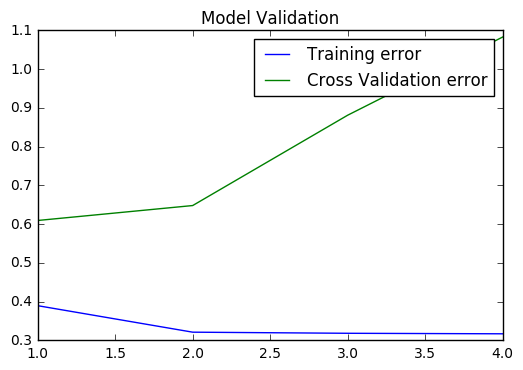

'\nlambdas = np.logspace(-5, 0, 15)\nrmse_trs = []\nfor lamb in lambdas:\n    w = ridge_regression(y, tX, lamb)\n\n    loss_train = compute_loss(y, tX, w)\n    rmse_train = np.sqrt(2*loss_train)\n\n    print("lambda={l:.3f}, proportion={p}, Training RMSE={tr:.3f}".format(\n        l=lamb, p=ratio, tr=rmse_train))\n    rmse_trs.append(rmse_train)\n    \np=plt.semilogx(lambdas,rmse_trs, marker=\'o\')\nplt.title("Ridge regression") \nplt.legend(p, ["Training error"])\nplt.xlabel(\'Lambdas\')\nplt.ylabel(\'rmse\')\nplt.show()\n'

In [67]:
#************** ridge regression ****************#

degrees = range(1,5)

lambda_ = 0.016
#model selection
mse_test_model_sel = []
mse_cv_model_sel = []
for degree in degrees:
    print("degree",degree)

    x_train_poly = build_poly(x_train,degree)
    x_cv_poly = build_poly(x_cv,degree)

    mse,weight = ridge_regression(y_train,x_train_poly, lambda_)
    mse_test_model_sel.append(mse)
    
    mse_cv = compute_loss(y_cv,x_cv_poly,weight)
    mse_cv_model_sel.append(mse_cv)
    
p = plt.plot(degrees,mse_test_model_sel,degrees,mse_cv_model_sel)
plt.title("Model Validation") 
plt.legend(p, ["Training error","Cross Validation error"])
plt.show()
    
"""
lambdas = np.logspace(-5, 0, 15)
rmse_trs = []
for lamb in lambdas:
    w = ridge_regression(y, tX, lamb)

    loss_train = compute_loss(y, tX, w)
    rmse_train = np.sqrt(2*loss_train)

    print("lambda={l:.3f}, proportion={p}, Training RMSE={tr:.3f}".format(
        l=lamb, p=ratio, tr=rmse_train))
    rmse_trs.append(rmse_train)
    
p=plt.semilogx(lambdas,rmse_trs, marker='o')
plt.title("Ridge regression") 
plt.legend(p, ["Training error"])
plt.xlabel('Lambdas')
plt.ylabel('rmse')
plt.show()
"""
#lambda=0.016, proportion=0.5, Training RMSE=0.883 
#is the last one before rmse is going up
#lambda_ = 0.016
#mse,weight = ridge_regression(y_test,x_test, lambda_)
#print(mse)
#print(weight)

In [68]:
#************** logistic regression ****************#
max_iters = 1
gamma = 0.000001
lambda_ = 0.016
mse,weight = reg_logistic_regression(y_test, x_test, lambda_, gamma, max_iters)
print(mse)
print(weight)

NameError: name 'math' is not defined

## Test of methods

In [ ]:
mse_train = compute_loss(y_train,x_train,weight)
print(mse_train)
#calculate pourcentage of prediction
y_pred = predict_labels(weight, x_test)
y_t = y_test * y_pred
y_correct = np.where(y_t==1)
print('Correct pourcentage predition =',np.shape(y_correct)[1]/np.shape(y_test)[0])

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = '' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)